In [25]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [26]:
dfVariant = pd.read_csv('covid-variants.csv')
dfVariant = dfVariant[(dfVariant['variant'] == 'Delta')]

# parse date, select range and indexing
dfVariant['date']= pd.to_datetime(dfVariant['date'])
dfVariant=dfVariant[(dfVariant['date']>'2021-1-1') & (dfVariant['date']<'2021-10-16')]
dfVariant.set_index(dfVariant['date'], inplace=True)

print(dfVariant.columns)

Index(['location', 'date', 'variant', 'num_sequences', 'perc_sequences',
       'num_sequences_total'],
      dtype='object')


In [27]:
df= pd.read_csv("owid-covid-data (1).csv")

# parse date, select range and indexing
df['date']= pd.to_datetime(df['date'])
df=df[(df['date']>'2021-1-1')&(df['date']<'2021-10-16')]
df.set_index(df['date'], inplace=True)

print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [28]:
# below locations looks OK
location = ['Argentina', 'Austria', 'Brazil', 'Bulgaria', 'Cambodia', 'France', 'Germany', 'Ireland', 'Italy',
            'Japan', 'Kenya', 'Malaysia', 'Mexico', 'Netherlands', 'Nigeria', 'Poland', 'Portugal', 'South Africa',
            'Spain', 'United States']

# all unique locations
# location = df["location"].unique().tolist()


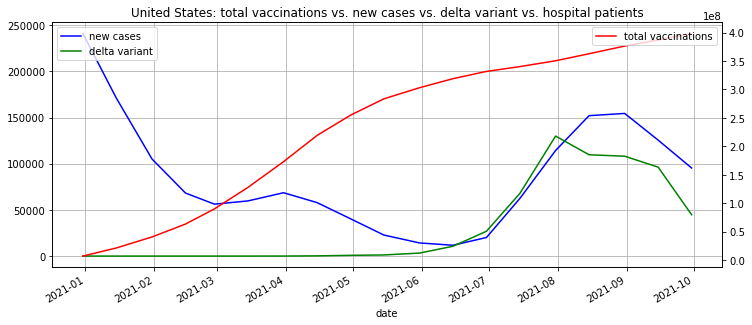

In [29]:
location = ['United States']

for ctry in location:

    # resample to biweekly
    dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
    # print(ctry, '\n', dfVariant.shape, dfVariant)

    dfTemp = df[df['location'] == ctry].resample('sm').mean()
    # print(ctry, '\n', df.shape, dfTemp['new_cases'], dfTemp['total_vaccinations'])

    plt.figure(figsize=(12,5))
    plt.title(f'{ctry}: total vaccinations vs. new cases vs. delta variant vs. hospital patients')
    ax1 = dfTemp.new_cases.plot(color='blue', grid=True, label='new cases')
    ax2 = dfTemp.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total vaccinations')
    ax3 = dfVariTemp.num_sequences.plot(color='green', grid=True, label='delta variant')

    # print(f"{ctry} total_vac vs new cases:")
    # print(dfTemp.total_vaccinations.corr(dfTemp.new_cases))
    #
    # print(f"{ctry} total_vac vs delta cases:")
    # print(dfTemp.total_vaccinations.iloc[10:].corr(dfVariTemp.num_sequences.iloc[10:]))
    #
    # print(f"{ctry} new cases vs delta cases:")
    # print(dfTemp.new_cases.iloc[10:].corr(dfVariTemp.num_sequences.iloc[10:]))

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()


    #plt.legend(h1+h2, l1+l2, loc=2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    ax3.legend(loc=2)


    plt.show()

United States 
 (63240, 65) 
              new_deaths  new_deaths_per_million  new_deaths_per_million  \
date                                                                      
2020-12-31  3203.076923                9.621308                9.621308   
2021-01-15  3222.375000                9.679313                9.679313   
2021-01-31  2684.533333                8.063600                8.063600   
2021-02-15  2009.769231                6.037000                6.037000   
2021-02-28  1453.266667                4.365333                4.365333   
2021-03-15   982.562500                2.951375                2.951375   
2021-03-31   887.600000                2.666200                2.666200   
2021-04-15   720.333333                2.163667                2.163667   
2021-04-30   647.133333                1.943867                1.943867   
2021-05-15   566.500000                1.701687                1.701687   
2021-05-31   390.000000                1.171400                1.17140

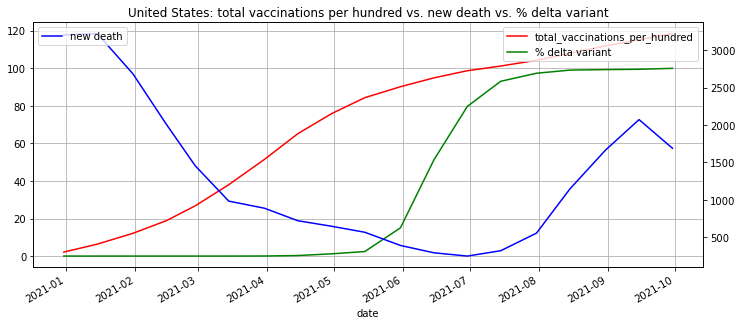

In [30]:
location = ['United States']

for ctry in location:

    # resample to biweekly
    dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
    # print(ctry, '\n', dfVariant.shape,'\n', dfVariTemp)

    dfTemp = df[df['location'] == ctry].resample('sm').mean()
    print(ctry, '\n', df.shape, '\n', dfTemp[['new_deaths', 'new_deaths_per_million', 'new_deaths_per_million',
                                              'total_vaccinations', 'total_vaccinations_per_hundred']])

    plt.figure(figsize=(12,5))
    plt.title(f'{ctry}: total vaccinations per hundred vs. new death vs. % delta variant')
    ax1 = dfTemp.new_deaths.plot(color='blue', grid=True, secondary_y=True, label='new death')
    ax2 = dfTemp.total_vaccinations_per_hundred.plot(color='red', grid=True, label='total_vaccinations_per_hundred')
    ax3 = dfVariTemp.perc_sequences.plot(color='green', grid=True, label='% delta variant')
    # ax4 = dfTemp.icu_patients.plot(color='purple', grid=True, label='icu patients')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()
    # h4, l4 = ax3.get_legend_handles_labels()

    #plt.legend(h1+h2, l1+l2, loc=2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    ax3.legend(loc=1)
    # ax4.legend(loc=2)

    plt.show()

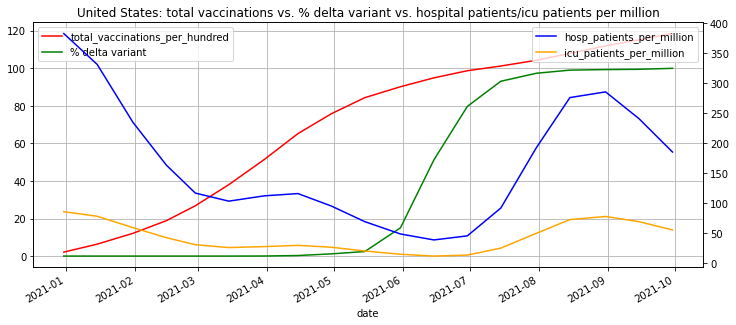

In [31]:
location = ['United States']

for ctry in location:

    # resample to biweekly
    dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
    # print(ctry, '\n', dfVariant.shape,'\n', dfVariTemp)

    dfTemp = df[df['location'] == ctry].resample('sm').mean()
    # print(ctry, '\n', df.shape, '\n', dfTemp[['icu_patients_per_million', 'weekly_icu_admissions','weekly_icu_admissions_per_million',
    #                                           'hosp_patients_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million',
    #                                           'hosp_patients', 'hospital_beds_per_thousand',
    #                                           'total_vaccinations', 'total_vaccinations_per_hundred']])

    plt.figure(figsize=(12,5))
    plt.title(f'{ctry}: total vaccinations vs. % delta variant vs. hospital patients/icu patients per million')
    ax1 = dfTemp.total_vaccinations_per_hundred.plot(color='red', grid=True, label='total_vaccinations_per_hundred')
    ax2 = dfVariTemp.perc_sequences.plot(color='green', grid=True, label='% delta variant')
    ax3 = dfTemp.hosp_patients_per_million  .plot(color='blue', grid=True,secondary_y=True, label='hosp_patients_per_million')
    ax4 = dfTemp.icu_patients_per_million.plot(color='orange', grid=True, secondary_y=True, label='icu_patients_per_million')


    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()
    h4, l4 = ax3.get_legend_handles_labels()

    #plt.legend(h1+h2, l1+l2, loc=2)
    ax1.legend(loc=2)
    ax2.legend(loc=2)
    ax3.legend(loc=1)
    ax4.legend(loc=1)

    plt.show()


In [32]:
from statsmodels.tsa.stattools import adfuller

def pt_result(input):
    if input > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")

location = ['United States']
col_names =['new_cases', 'new_deaths', 'total_vaccinations', 'hosp_patients', 'icu_patients']

for ctry in location:
    for col in col_names:

        # !!! the data is weekly

        # dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
        dfTemp = df[df['location'] == ctry].resample('w').mean()

        print('\n' + col + " stationary test (ADF test):")
        print(dfTemp.shape)
        result = adfuller(dfTemp[col])
        # print(f'Test Statistics: {result[0]}')
        # print(f'p-value: {result[1]}')
        # print(f'critical_values: {result[4]}')
        pt_result(result[1])



new_cases stationary test (ADF test):
(42, 60)
Series is not stationary

new_deaths stationary test (ADF test):
(42, 60)
Series is stationary

total_vaccinations stationary test (ADF test):
(42, 60)
Series is stationary

hosp_patients stationary test (ADF test):
(42, 60)
Series is not stationary

icu_patients stationary test (ADF test):
(42, 60)
Series is not stationary


In [33]:
from statsmodels.tsa.stattools import grangercausalitytests
tup_ls = [('new_deaths', 'total_vaccinations')]

for ctry in location:
    for tup in tup_ls:
        dfTemp = df[df['location'] == ctry].resample('w').mean()
        grangercausalitytests(dfTemp[[tup[0], tup[1]]], maxlag=2)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0775  , p=0.3058  , df_denom=38, df_num=1
ssr based chi2 test:   chi2=1.1626  , p=0.2809  , df=1
likelihood ratio test: chi2=1.1464  , p=0.2843  , df=1
parameter F test:         F=1.0775  , p=0.3058  , df_denom=38, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8341  , p=0.0312  , df_denom=35, df_num=2
ssr based chi2 test:   chi2=8.7638  , p=0.0125  , df=2
likelihood ratio test: chi2=7.9243  , p=0.0190  , df=2
parameter F test:         F=3.8341  , p=0.0312  , df_denom=35, df_num=2
